In [1]:
import glob
import os
import random

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import cv2 as cv



In [2]:
BACKGROUND_DIRECTORY = "./data/images_background/"
EVALUATION_DIRECTORY = "./data/images_evaluation/"

background_alphabets = glob.glob(f"{BACKGROUND_DIRECTORY}/*")
evaluation_alphabets = glob.glob(f"{EVALUATION_DIRECTORY}/*")

background_characters = glob.glob(f"{BACKGROUND_DIRECTORY}/*/*")
evaluation_characters = glob.glob(f"{EVALUATION_DIRECTORY}/*/*")

background_images = glob.glob(f"{BACKGROUND_DIRECTORY}/*/*/*")
evaluation_images = glob.glob(f"{EVALUATION_DIRECTORY}/*/*/*")

print(f"Total Background Alphabets: {len(background_alphabets)}")
print(f"Total Evaluation Alphabets: {len(evaluation_alphabets)}")


print(f"Total Background Characters: {len(background_characters)}")
print(f"Total Evaluation Characters: {len(evaluation_characters)}")


print(f"Total Background Images: {len(background_images)}")
print(f"Total Evaluation Images: {len(evaluation_images)}")

Total Background Alphabets: 30
Total Evaluation Alphabets: 20
Total Background Characters: 964
Total Evaluation Characters: 659
Total Background Images: 19280
Total Evaluation Images: 13180


In [3]:
b_alphabet_to_characters = {
    alphabet: glob.glob(f"{alphabet}/*")
    for alphabet in background_alphabets
}

b_alphabet_to_images = {
    alphabet: glob.glob(f"{alphabet}/*/*")
    for alphabet in background_alphabets
}

e_alphabet_to_characters = {
    alphabet: glob.glob(f"{alphabet}/*")
    for alphabet in evaluation_alphabets
}

e_alphabet_to_images = {
    alphabet: glob.glob(f"{alphabet}/*/*")
    for alphabet in evaluation_alphabets
}

In [4]:
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    """Shows a set of images in a gallery that flexes with the width of the notebook.
    
    Parameters
    ----------
    images: list of str or bytes
        URLs or bytes of images to display

    row_height: str
        CSS height value to assign to all images. Set to 'auto' by default to show images
        with their native dimensions. Set to a value like '250px' to make all rows
        in the gallery equal height.
    """
    figures = []
    for image in images:
        if isinstance(image, bytes):
            src = _src_from_data(image)
            caption = ''
        else:
            src = image
            caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              {caption}
            </figure>
        ''')
    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

In [5]:
alphabet = random.choice(background_alphabets)
print(f"Random 50 images from Alphabet: {alphabet}")
gallery(random.sample(b_alphabet_to_images[alphabet], 50), 1)

Random 50 images from Alphabet: ./data/images_background/Mkhedruli_(Georgian)


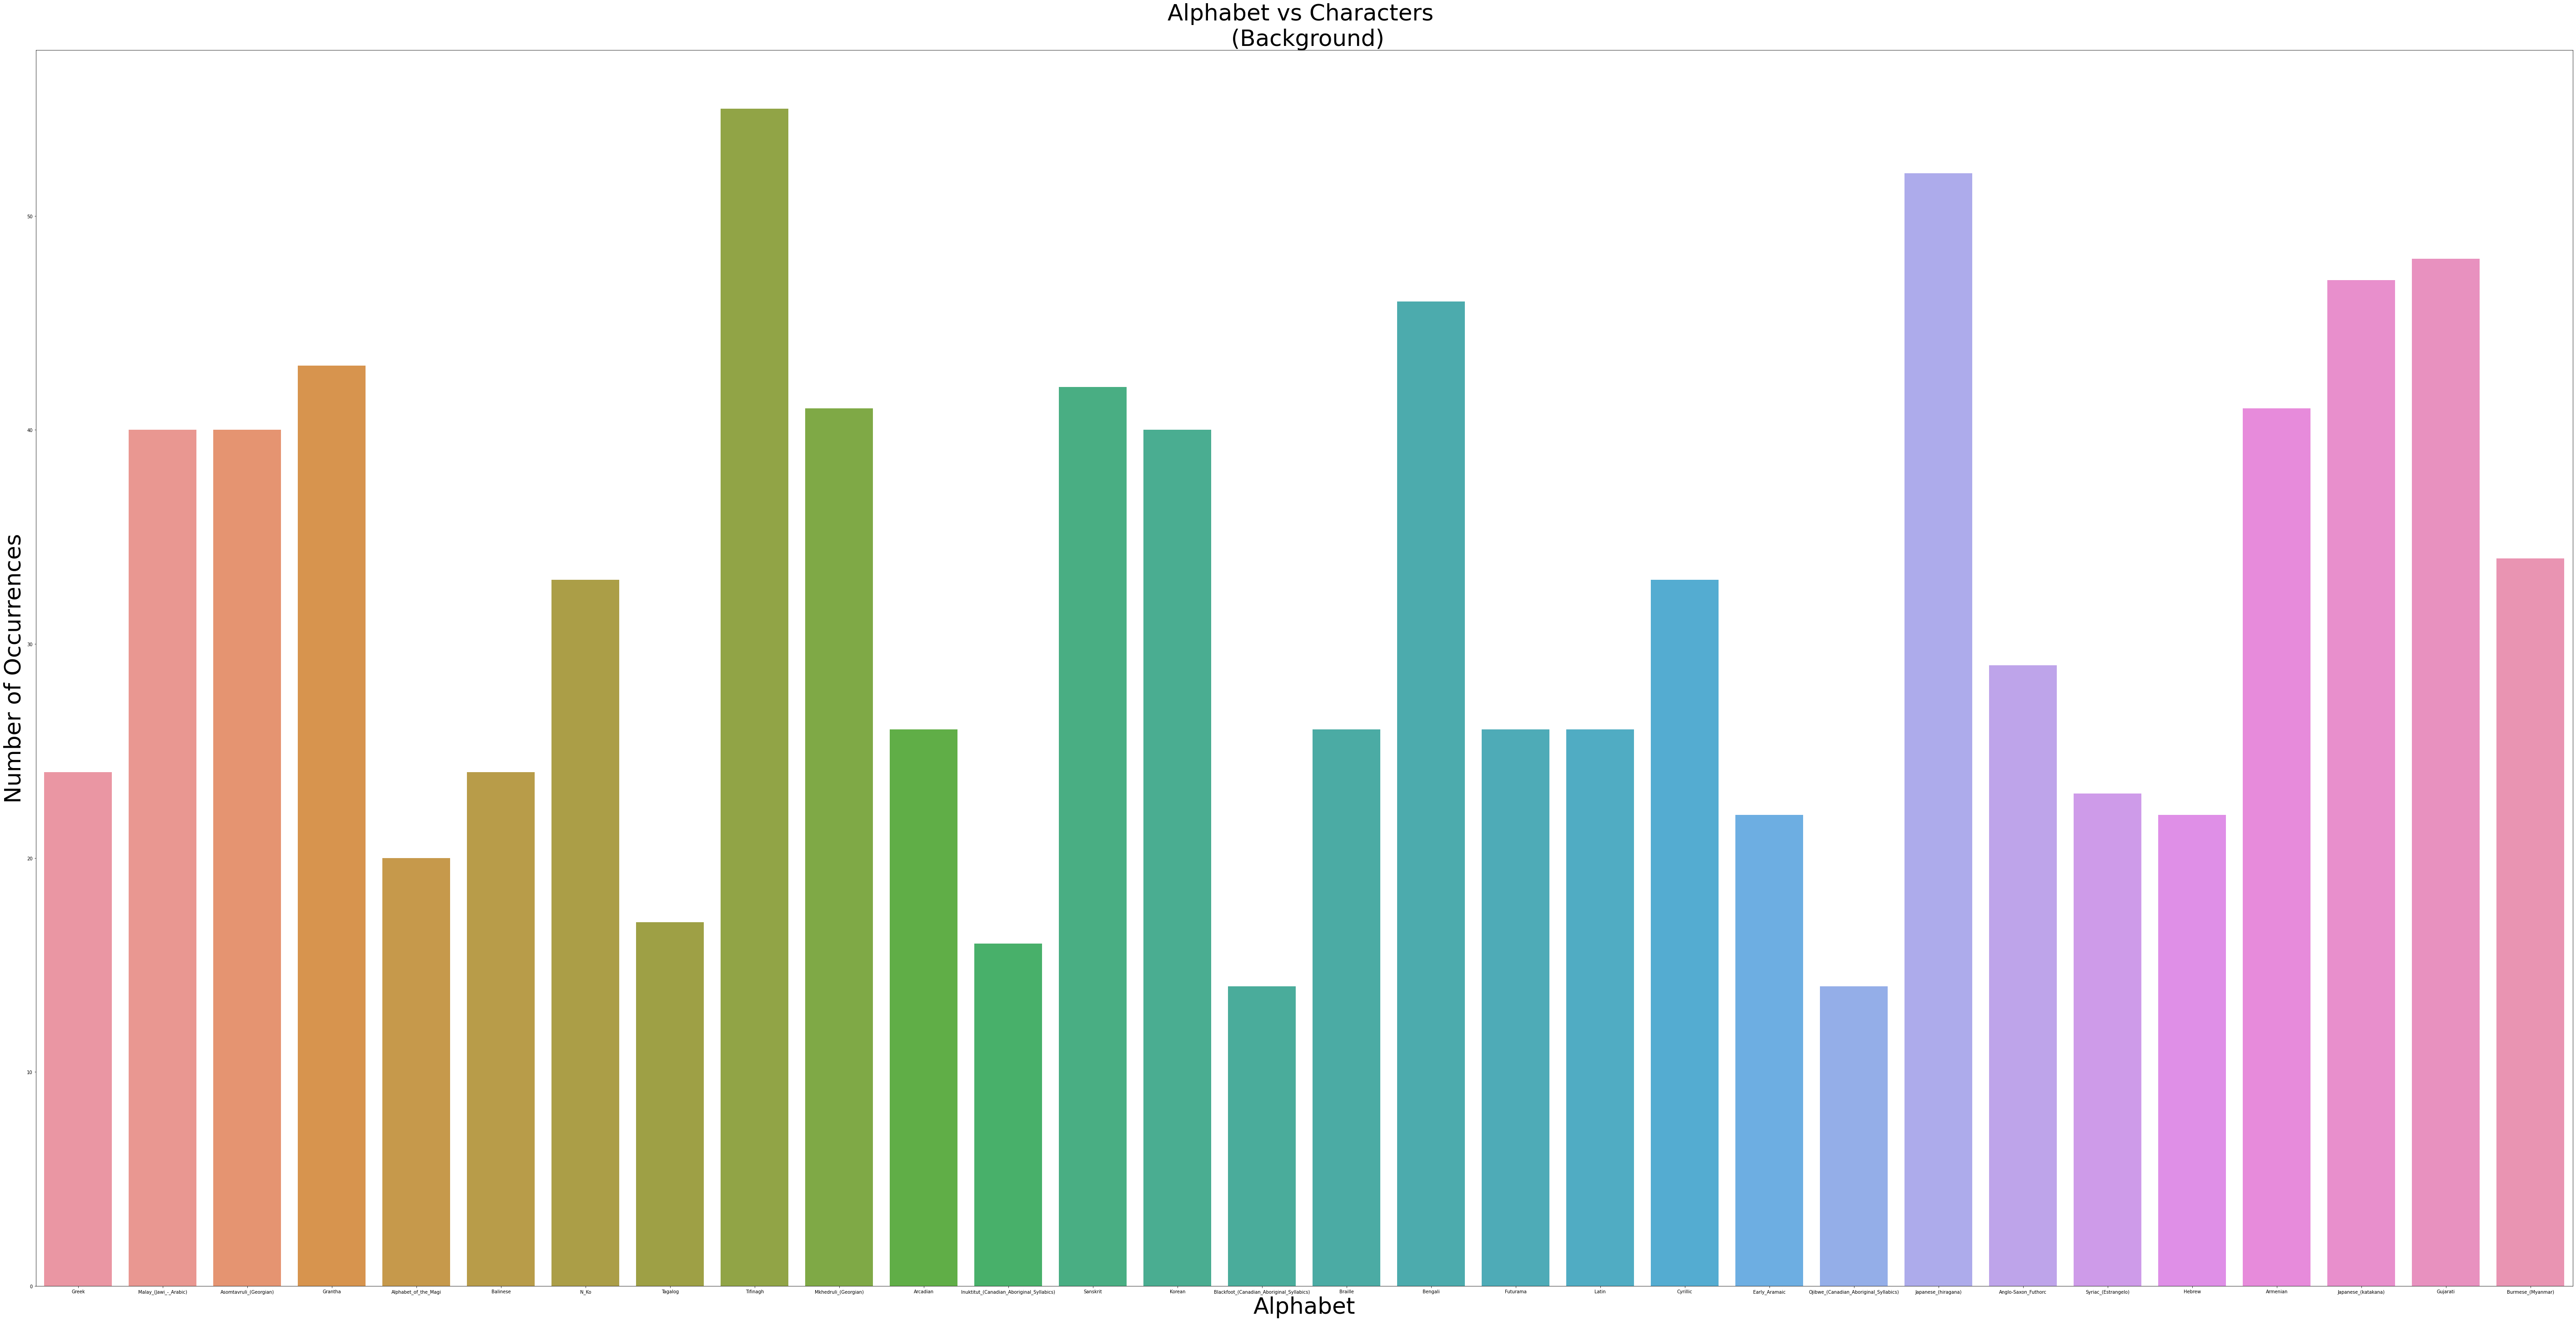

In [6]:

char_counts  = [ len(b_alphabet_to_characters[alphabet]) for alphabet in background_alphabets]

plt.figure(figsize=(100,50))
sns.barplot(x=[alphabet.rsplit("/", 1)[-1] for alphabet in background_alphabets] , y=char_counts, alpha=1)
plt.title('Alphabet vs Characters \n (Background)', fontsize=50)
plt.ylabel('Number of Occurrences', fontsize=50)
plt.xlabel('Alphabet', fontsize=50)



plt.show()

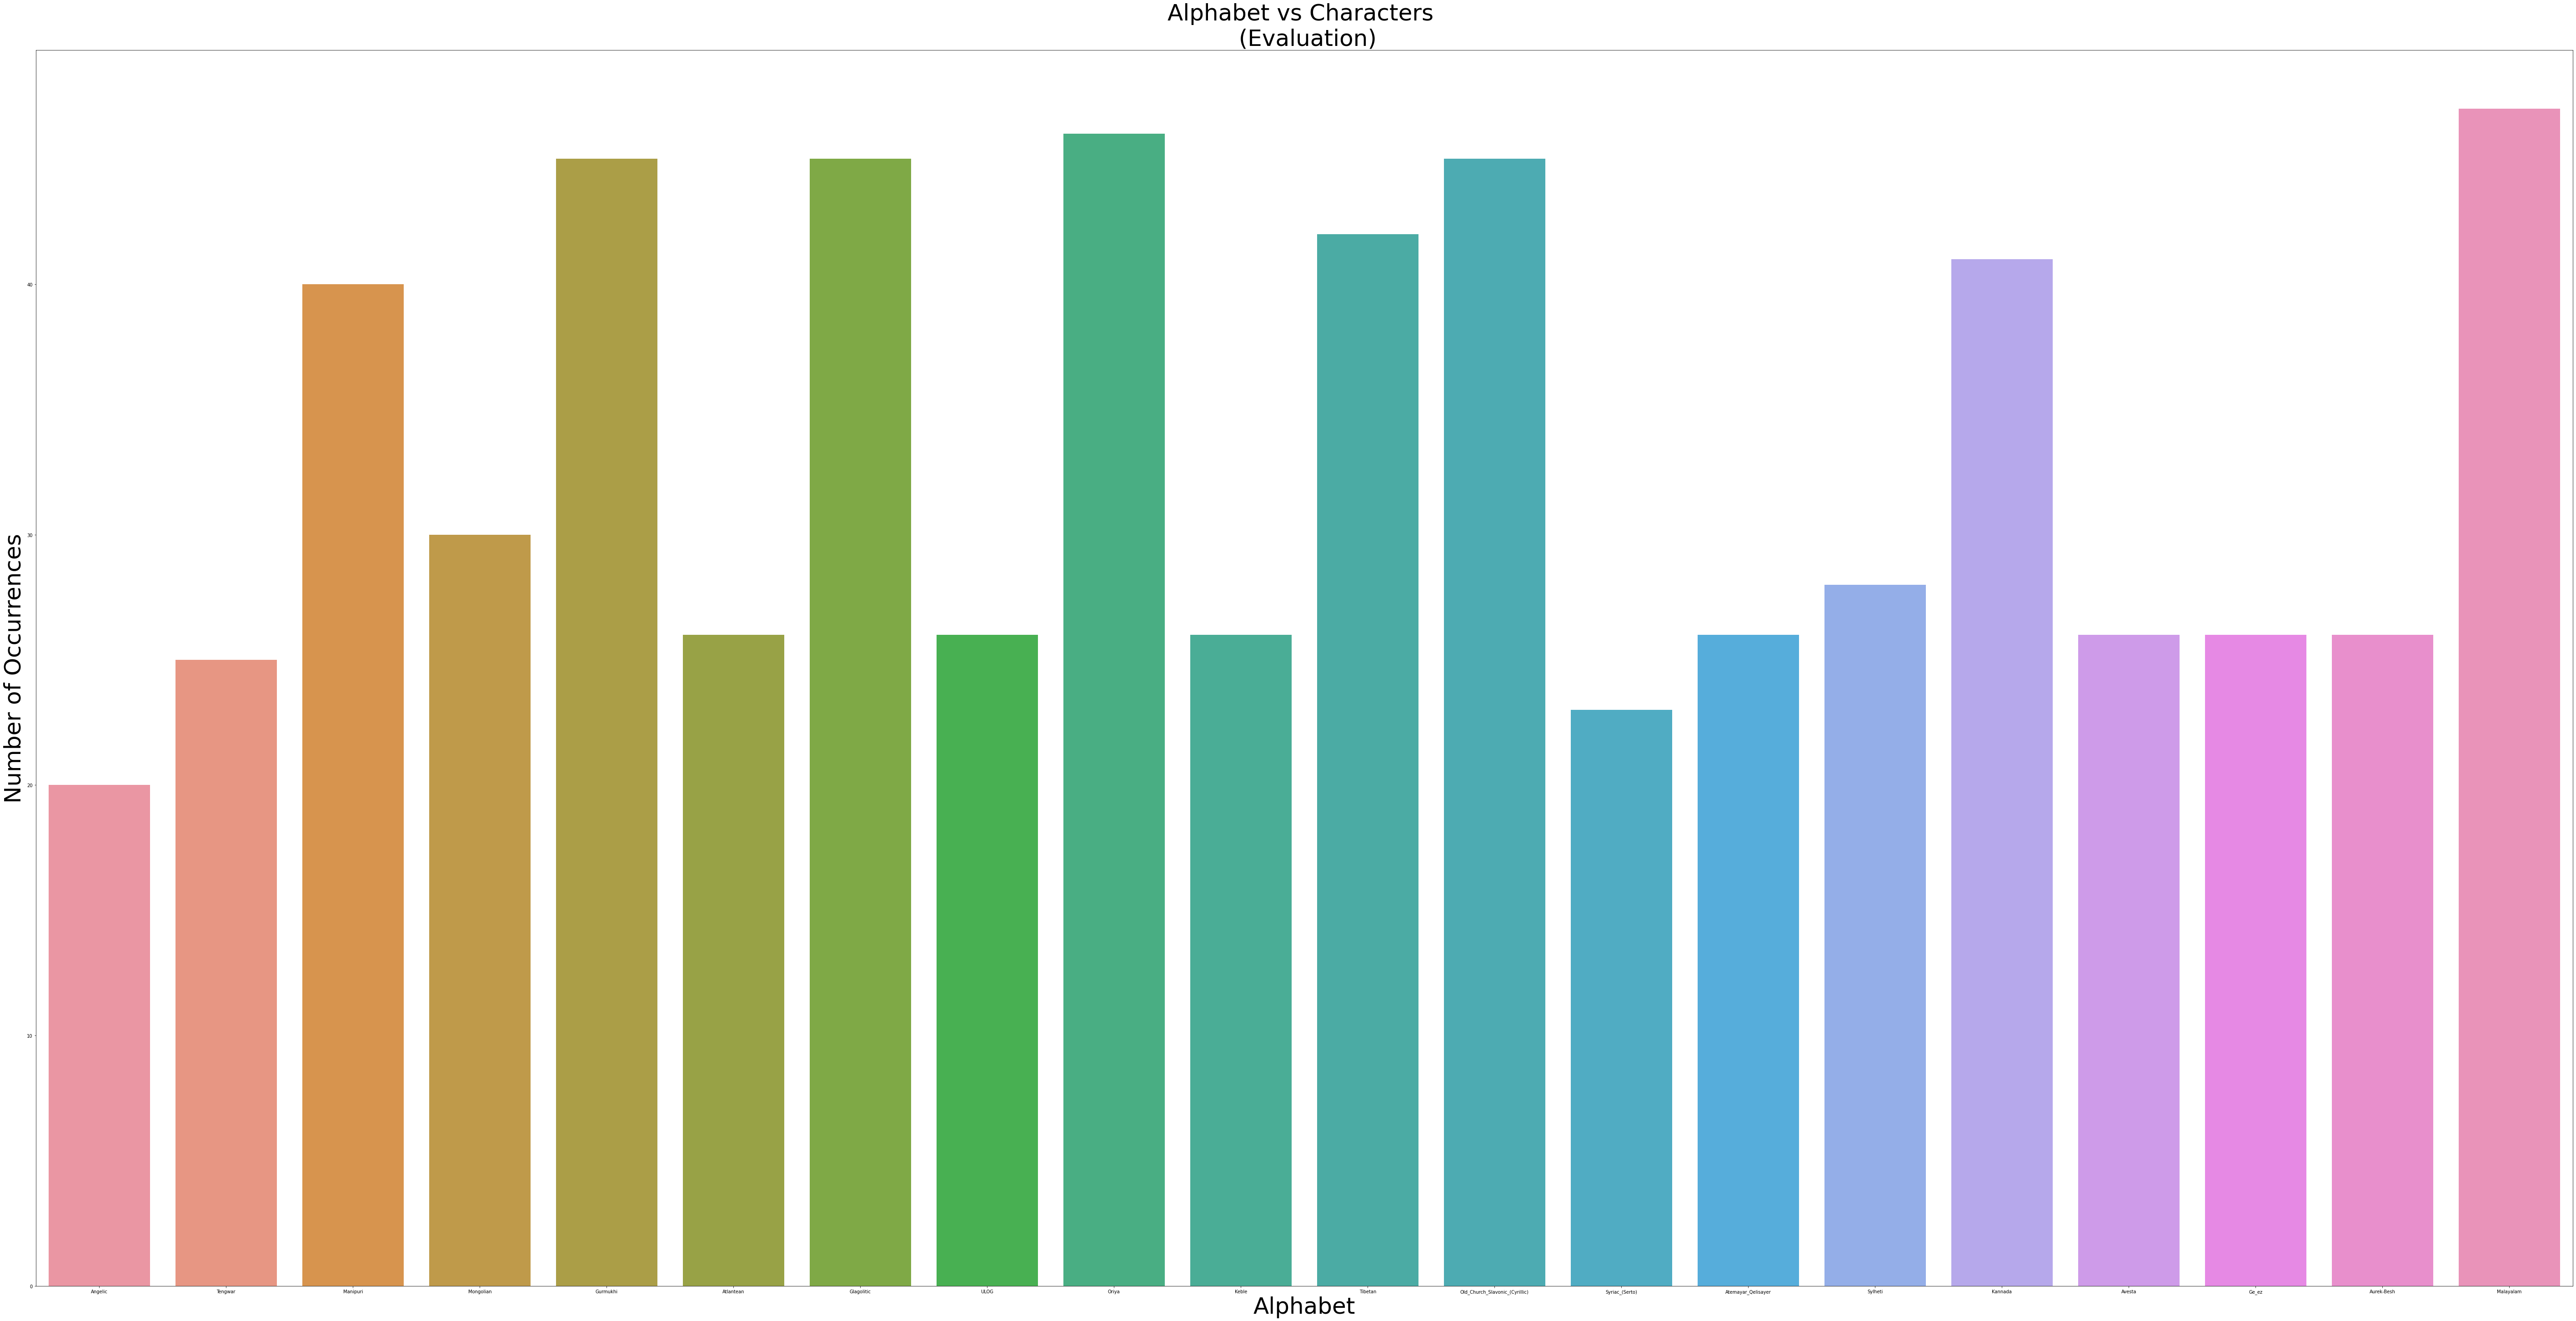

In [7]:



char_counts  = [ len(e_alphabet_to_characters[alphabet]) for alphabet in evaluation_alphabets]

plt.figure(figsize=(100,50))
sns.barplot(x=[alphabet.rsplit("/", 1)[-1] for alphabet in evaluation_alphabets] , y=char_counts, alpha=1)
plt.title('Alphabet vs Characters \n (Evaluation)', fontsize=50)
plt.ylabel('Number of Occurrences', fontsize=50)
plt.xlabel('Alphabet', fontsize=50)



plt.show()